## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

**Exploratory Data Analysis (EDA)** is a way of examining, investigating, and summarizing data sets' major properties, which frequently involves the use of data visualization techniques. It assists data analysts in determining how to best modify data sources to obtain the answers they require, making it easier for them to uncover patterns, abnormalities, and outliers.

After wrangling and saving the cleaned dataset collected from WeRateDogs, several research questions were asked to ensure the maximal utilization from it, after which visualizations and insights were developed. These questions are:

> 1. How optimized is the image recognition algorithm model?
> 2. Which dog name(s) is the most popular?
> 3. Which dog name(s) is the least popular?
> 4. Which dog breed is the most popular?
> 5. Which dog breed has the highest and lowest average ratings?
> 6. Which dog stage has the highest average favorite and retweet count?
> 7. Which dog stage is largely dominant in the dataset?
> 8. Which dog breed has the highest average favorite and retweet count?


In [1]:
import pandas as pd
import numpy as np
import requests
import json
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read dataset on a pandas dataframe
df = pd.read_csv('twitter_archive_master.csv')
df.sample()

,tweet_id,timestamp,rating_numerator,rating_denominator,dog_name,tweet_link,dog_stage,dog_breed,image_prediction_confidence,is_dog,retweet_count,favorite_count
468,770787852854652928,2016-08-31 00:58:39,10.0,10,Winston,https://t.co/d0QEbp78Yi,NaN,bernese_mountain_dog,0.787812,True,1415,5498


###### Question one

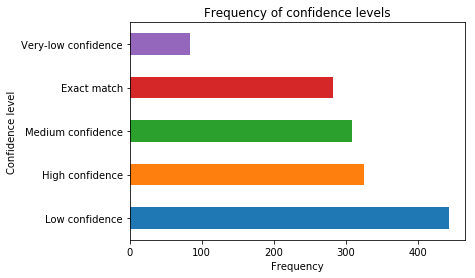

In [8]:
bins = [0,0.2,0.5,0.7,0.9,1.0]
labels = ['Very-low confidence', 'Low confidence','Medium confidence','High confidence','Exact match']

conf_level = pd.cut(df['image_prediction_confidence'],bins = bins, labels = labels, right = False)
conf_level = conf_level.value_counts()
conf_level.plot(kind = 'barh');
plt.xlabel("Frequency")
plt.ylabel("Confidence level")
plt.title("Frequency of confidence levels");

**Insight:** The image recognition model requires more optimization for effective and more efficient recognition as images with low confidence interval are higher tha other categories.

###### Question two

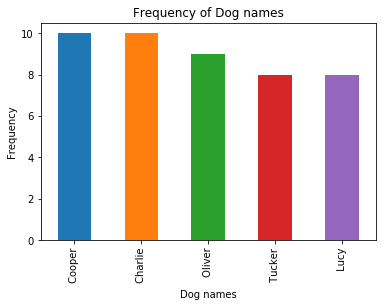

In [9]:
column = df.dog_name
def PopularVis(column):
    Pop = column.value_counts().head()
    Pop.plot(kind= 'bar')
    plt.show();
    
plt.xlabel("Dog names")
plt.ylabel("Frequency")
plt.title("Frequency of Dog names");
    

PopularVis(column)

**Insight:** Many people prefer the names 'Charlie' and 'Cooper' for their dogs

**Question three**

In [10]:
Least_dogname = df.query('dog_name == dog_name')
Least_dogname = Least_dogname.groupby('dog_name').count()[['is_dog']]
Least_dogname.rename(columns ={ 'is_dog' : 'count'}, inplace = True)
Least_dogname = Least_dogname.query('count <= 1')
Least_dogname

,count
dog_name,
Ace,1
Acro,1
Adele,1
Aiden,1
Aja,1
Akumi,1
Albert,1
Aldrick,1
Alejandro,1


**Insight:** There are 596 least popular dog names in the dataset which indicates that people prefer to give their dogs unique names.

**Question four**

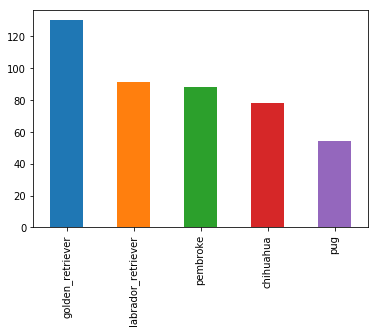

In [11]:
column = df['dog_breed']
PopularVis(column)

**Insight:** The above visualization shows that dog lovers have a general preference for the golden retriever breed 

**Question five**

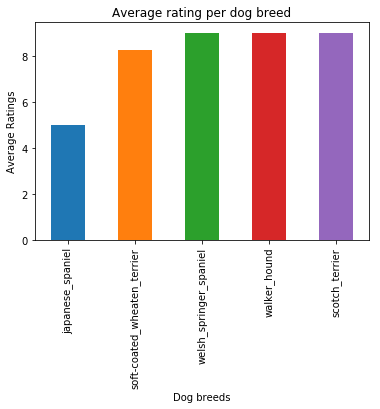

In [13]:
dog_ratingslow = df.groupby('dog_breed').rating_numerator.mean().sort_values().head(5)
dog_ratingslow.plot(kind = 'bar')
plt.xlabel("Dog breeds")
plt.ylabel("Average Ratings")
plt.title("Average rating per dog breed");

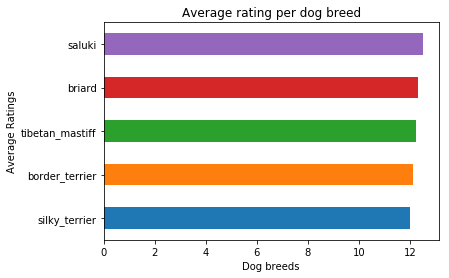

In [15]:
dog_ratingshigh = df.groupby('dog_breed').rating_numerator.mean().sort_values().tail(5)
dog_ratingshigh.plot(kind = 'barh')
plt.xlabel("Dog breeds")
plt.ylabel("Average Ratings")
plt.title("Average rating per dog breed");

**Insight:** The Saluki breed has the highest average rating and Japanese spaniel has the lowest average rating. This shows that there is a general love and preference for the Saluki dog breed.

**Question six**

In [16]:
df.groupby('dog_stage').retweet_count.mean().sort_values()

dog_stage
pupper     2557.027778
floofer    4968.714286
puppo      6551.473684
doggo      7594.854167
Name: retweet_count, dtype: float64

In [17]:
df.groupby('dog_stage').favorite_count.mean().sort_values()

dog_stage
pupper      8048.430556
floofer    13206.000000
doggo      20556.354167
puppo      22308.210526
Name: favorite_count, dtype: float64

**Insight:** There is general preference for dogs at the doggo and puppo stages

**Question seven**

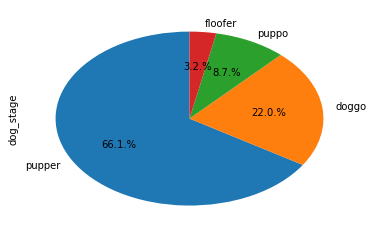

In [18]:
df['dog_stage'].value_counts().plot(kind = 'pie', autopct = '%1.1f.%%', startangle = 90);

**Insight:** Majority of the dogs in the dataset are pupper

**Question eight**

In [19]:
df.groupby('dog_breed').retweet_count.mean().sort_values().head(10)

dog_breed
curly-coated_retriever         270.500000
brabancon_griffon              287.666667
groenendael                    413.000000
ibizan_hound                   431.000000
japanese_spaniel               471.000000
welsh_springer_spaniel         517.000000
tibetan_terrier                557.750000
entlebucher                    706.000000
soft-coated_wheaten_terrier    736.250000
scottish_deerhound             764.333333
Name: retweet_count, dtype: float64

In [20]:
df.groupby('dog_breed').favorite_count.mean().sort_values().head(10)

dog_breed
brabancon_griffon               885.000000
curly-coated_retriever          967.500000
ibizan_hound                   1114.666667
japanese_spaniel               1362.000000
tibetan_terrier                1841.000000
groenendael                    1896.000000
soft-coated_wheaten_terrier    2040.625000
standard_schnauzer             2046.000000
scottish_deerhound             2485.666667
lhasa                          2659.800000
Name: favorite_count, dtype: float64

**Insight:** The 'standard poodle' dog breed has a higher average retweet count than every other stage while 'saluki' breed dominates the average favorite count category. The 'saluki' breed is generally loved.

